___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from customer of a food delivery company.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will specify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

***Features:***
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- ***Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise*** 
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- The First Look

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering with numeric features

    * Create a new dataset with numeric features
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Clustering based on selected features

    * Create a new dataset with variables of your choice*
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering with selected features

    * Determine optimal number of clusters using Dendogram*

    * Apply Agglomerative Clustering*

    * Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.metrics import silhouette_score

from ipywidgets import interact
import warnings

warnings.filterwarnings("ignore")

pd.options.display.float_format = (
    lambda x: "{:.0f}".format(x) if int(x) == x else "{:,.2f}".format(x)
)

### Load Dataset

In [2]:
df0 = pd.read_csv('marketing_campaign.csv')


df0.head()

ID;Year_Birth;Education;Marital_Status;Income;Kidhome;Teenhome;Dt_Customer;Recency;MntWines;MntFruits;MntMeatProducts;MntFishProducts;MntSweetProducts;MntGoldProds;NumDealsPurchases;NumWebPurchases;NumCatalogPurchases;NumStorePurchases;NumWebVisitsMonth;AcceptedCmp3;AcceptedCmp4;AcceptedCmp5;AcceptedCmp1;AcceptedCmp2;Complain;Z_CostContact;Z_Revenue;Response
0  5524;1957;Graduation;Single;58138;0;0;2012-09-...                                                                                                                                                                                                                                                                                                                      
1  2174;1954;Graduation;Single;46344;1;1;2014-03-...                                                                                                                                                                                                                                                                                                                      
2  4141;1965;Graduation;Together;71613;0;0;2013-0...                                                                                                                                                                                                                                                                                                                      
3  6182;1984;Graduation;Together;26646;1;0;2014-0...                                                                                                                                                                                                                                                                                                                      
4  5324;1981;PhD;Married;58293;1;0;2014-01-19;94;...

In [3]:
# Data Cleaning

# Define the input and output file paths
input_file = 'marketing_campaign.csv'  
output_file = 'marketing_campaign_cleaned.csv' 

# Open the input file for reading
with open(input_file, 'r') as infile:
    # Read the entire content of the file
    content = infile.read()

# Replace all semicolons with commas
content = content.replace(';', ',')

# Open the output file for writing
with open(output_file, 'w') as outfile:
    # Write the updated content to the output file
    outfile.write(content)

print(f"Semicolons replaced with commas. Output saved to {output_file}")

Semicolons replaced with commas. Output saved to marketing_campaign_cleaned.csv


In [4]:
df0 = pd.read_csv('marketing_campaign_cleaned.csv')

df = df0.copy()

df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
df.Z_Revenue.value_counts()

Z_Revenue
11    2240
Name: count, dtype: int64

### The First Look
- Since we will do clustering analysis, we will remove Response variable from dataset.
- You can rename columns to more usable, if you need.

In [6]:
df.info(max_cols=29)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.shape

(2240, 29)

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df[df['Income'].isna()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
10    2013-11-15       11         5  ...                  7             0   
27    2013-02-20       19         5  ...                  1             0   
43    2013-11-05       80        81  ...                  2             0   
48    2014-01-01       96        48  ...                  6             0   
58    2013-06-17       57        11  ...                  6             0   
71    2012-09-14       25        25  ...                  8             0   
90    2012-11-19        4       230  ...                  9             0   
91    2014-05-27       45         7  ...                  7             0   
92    2013-11-23       87       445  ...                  1             0   
128   2013-07-11       23       352  ...                  6             0   
133   2013-08-11       96       231  ...                  4             0   
312   2013-06-03       69       861  ...                  3             0   
319   2013-08-23       67       738  ...                  7             0   
1379  2013-04-01       39       187  ...                  5             0   
1382  2012-09-03       87        19  ...                  5             0   
1383  2014-01-12       49         5  ...                  7             0   
1386  2014-03-02       17        25  ...                  7             0   
2059  2013-05-18       52       375  ...                  3             0   
2061  2013-05-31       82        23  ...                  6             0   
2078  2013-03-03       82        71  ...                  8             0   
2079  2013-06-23       83       161  ...                  6             0   
2081  2013-10-18       95       264  ...                  7             0   
2084  2013-10-30       75       532  ...                  1             0   
2228  2012-08-12       53        32  ...                  0             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedC

In [10]:
df.dropna(subset=['Income'], inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
df.shape

(2216, 29)

In [12]:
df.info(max_cols=29)

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [13]:
df.describe().T

count      mean       std  min      25%       50%  \
ID                    2216  5,588.35  3,249.38    0 2,814.75  5,458.50   
Year_Birth            2216  1,968.82     11.99 1893     1959      1970   
Income                2216 52,247.25 25,173.08 1730    35303 51,381.50   
Kidhome               2216      0.44      0.54    0        0         0   
Teenhome              2216      0.51      0.54    0        0         0   
Recency               2216     49.01     28.95    0       24        49   
MntWines              2216    305.09    337.33    0       24    174.50   
MntFruits             2216     26.36     39.79    0        2         8   
MntMeatProducts       2216    167.00    224.28    0       16        68   
MntFishProducts       2216     37.64     54.75    0        3        12   
MntSweetProducts      2216     27.03     41.07    0        1         8   
MntGoldProds          2216     43.97     51.82    0        9     24.50   
NumDealsPurchases     2216      2.32      1.92    0        1         2   
NumWebPurchases       2216      4.09      2.74    0        2         4   
NumCatalogPurchases   2216      2.67      2.93    0        0         2   
NumStorePurchases     2216      5.80      3.25    0        3         5   
NumWebVisitsMonth     2216      5.32      2.43    0        3         6   
AcceptedCmp3          2216      0.07      0.26    0        0         0   
AcceptedCmp4          2216      0.07      0.26    0        0         0   
AcceptedCmp5          2216      0.07      0.26    0        0         0   
AcceptedCmp1          2216      0.06      0.24    0        0         0   
AcceptedCmp2          2216      0.01      0.12    0        0         0   
Complain              2216      0.01      0.10    0        0         0   
Z_CostContact         2216         3         0    3        3         3   
Z_Revenue             2216        11         0   11       11        11   
Response              2216      0.15      0.36    0        0         0   

                         75%    max  
ID                  8,421.75  11191  
Year_Birth              1977   1996  
Income                 68522 666666  
Kidhome                    1      2  
Teenhome                   1      2  
Recency                   74     99  
MntWines                 505   1493  
MntFruits                 33    199  
MntMeatProducts       232.25   1725  
MntFishProducts           50    259  
MntSweetProducts          33    262  
MntGoldProds              56    321  
NumDealsPurchases          3     15  
NumWebPurchases            6     27  
NumCatalogPurchases        4     28  
NumStorePurchases          8     13  
NumWebVisitsMonth          7     20  
AcceptedCmp3               0      1  
AcceptedCmp4               0      1  
AcceptedCmp5               0      1  
AcceptedCmp1               0      1  
AcceptedCmp2               0      1  
Complain                   0      1  
Z_CostContact              3      3  
Z_Revenue                 11     11  
Response                   0      1

In [14]:
# Data Adjustments for PCA
df.drop(columns=['Education', 'Marital_Status'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Dt_Customer          2216 non-null   object 
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   int64 

In [15]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print(df['Dt_Customer'].dtypes)

datetime64[ns]


In [16]:
today = pd.Timestamp.now().normalize()

df['DaysAgoEnrolled'] = (today - df['Dt_Customer']).dt.days
df.insert(6,'DaysAgoEnrolled', df.pop('DaysAgoEnrolled'))

df.head()

ID  Year_Birth  Income  Kidhome  Teenhome Dt_Customer  DaysAgoEnrolled  \
0  5524        1957   58138        0         0  2012-09-04             4546   
1  2174        1954   46344        1         1  2014-03-08             3996   
2  4141        1965   71613        0         0  2013-08-21             4195   
3  6182        1984   26646        1         0  2014-02-10             4022   
4  5324        1981   58293        1         0  2014-01-19             4044   

   Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  AcceptedCmp3  \
0       58       635         88  ...                  7             0   
1       38        11          1  ...                  5             0   
2       26       426         49  ...                  4             0   
3       26        11          4  ...                  6             0   
4       94       173         43  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 28 columns]

In [17]:
from datetime import datetime

current_year = datetime.now().year

df['Age'] = (current_year - df['Year_Birth'])
df.insert(2, 'Age', df.pop('Age'))

df.head()

ID  Year_Birth  Age  Income  Kidhome  Teenhome Dt_Customer  \
0  5524        1957   68   58138        0         0  2012-09-04   
1  2174        1954   71   46344        1         1  2014-03-08   
2  4141        1965   60   71613        0         0  2013-08-21   
3  6182        1984   41   26646        1         0  2014-02-10   
4  5324        1981   44   58293        1         0  2014-01-19   

   DaysAgoEnrolled  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0             4546       58       635  ...                  7             0   
1             3996       38        11  ...                  5             0   
2             4195       26       426  ...                  4             0   
3             4022       26        11  ...                  6             0   
4             4044       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Age                  2216 non-null   int64         
 3   Income               2216 non-null   float64       
 4   Kidhome              2216 non-null   int64         
 5   Teenhome             2216 non-null   int64         
 6   Dt_Customer          2216 non-null   datetime64[ns]
 7   DaysAgoEnrolled      2216 non-null   int64         
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [19]:
df.head()

ID  Year_Birth  Age  Income  Kidhome  Teenhome Dt_Customer  \
0  5524        1957   68   58138        0         0  2012-09-04   
1  2174        1954   71   46344        1         1  2014-03-08   
2  4141        1965   60   71613        0         0  2013-08-21   
3  6182        1984   41   26646        1         0  2014-02-10   
4  5324        1981   44   58293        1         0  2014-01-19   

   DaysAgoEnrolled  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0             4546       58       635  ...                  7             0   
1             3996       38        11  ...                  5             0   
2             4195       26       426  ...                  4             0   
3             4022       26        11  ...                  6             0   
4             4044       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
# Find the unique varibles in each column
df.nunique()

ID                     2216
Year_Birth               59
Age                      59
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
DaysAgoEnrolled         662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
# Drop the columns with variables that aren't useful for PCA
df.drop(columns=['ID', 'Year_Birth', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5','Z_CostContact','Z_Revenue', 'Response', 'Complain'], inplace=True)
df.head()

Age  Income  Kidhome  Teenhome  DaysAgoEnrolled  Recency  MntWines  \
0   68   58138        0         0             4546       58       635   
1   71   46344        1         1             3996       38        11   
2   60   71613        0         0             4195       26       426   
3   41   26646        1         0             4022       26        11   
4   44   58293        1         0             4044       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  
0                  4                  7  
1                  2                  5  
2                 10                  4  
3                  4                  6  
4                  6                  5

In [30]:
df.nunique()

Age                      59
Income                 1974
Kidhome                   3
Teenhome                  3
DaysAgoEnrolled         662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
dtype: int64

In [31]:
# for col in df.columns:
#     print(df[col].nunique())

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.

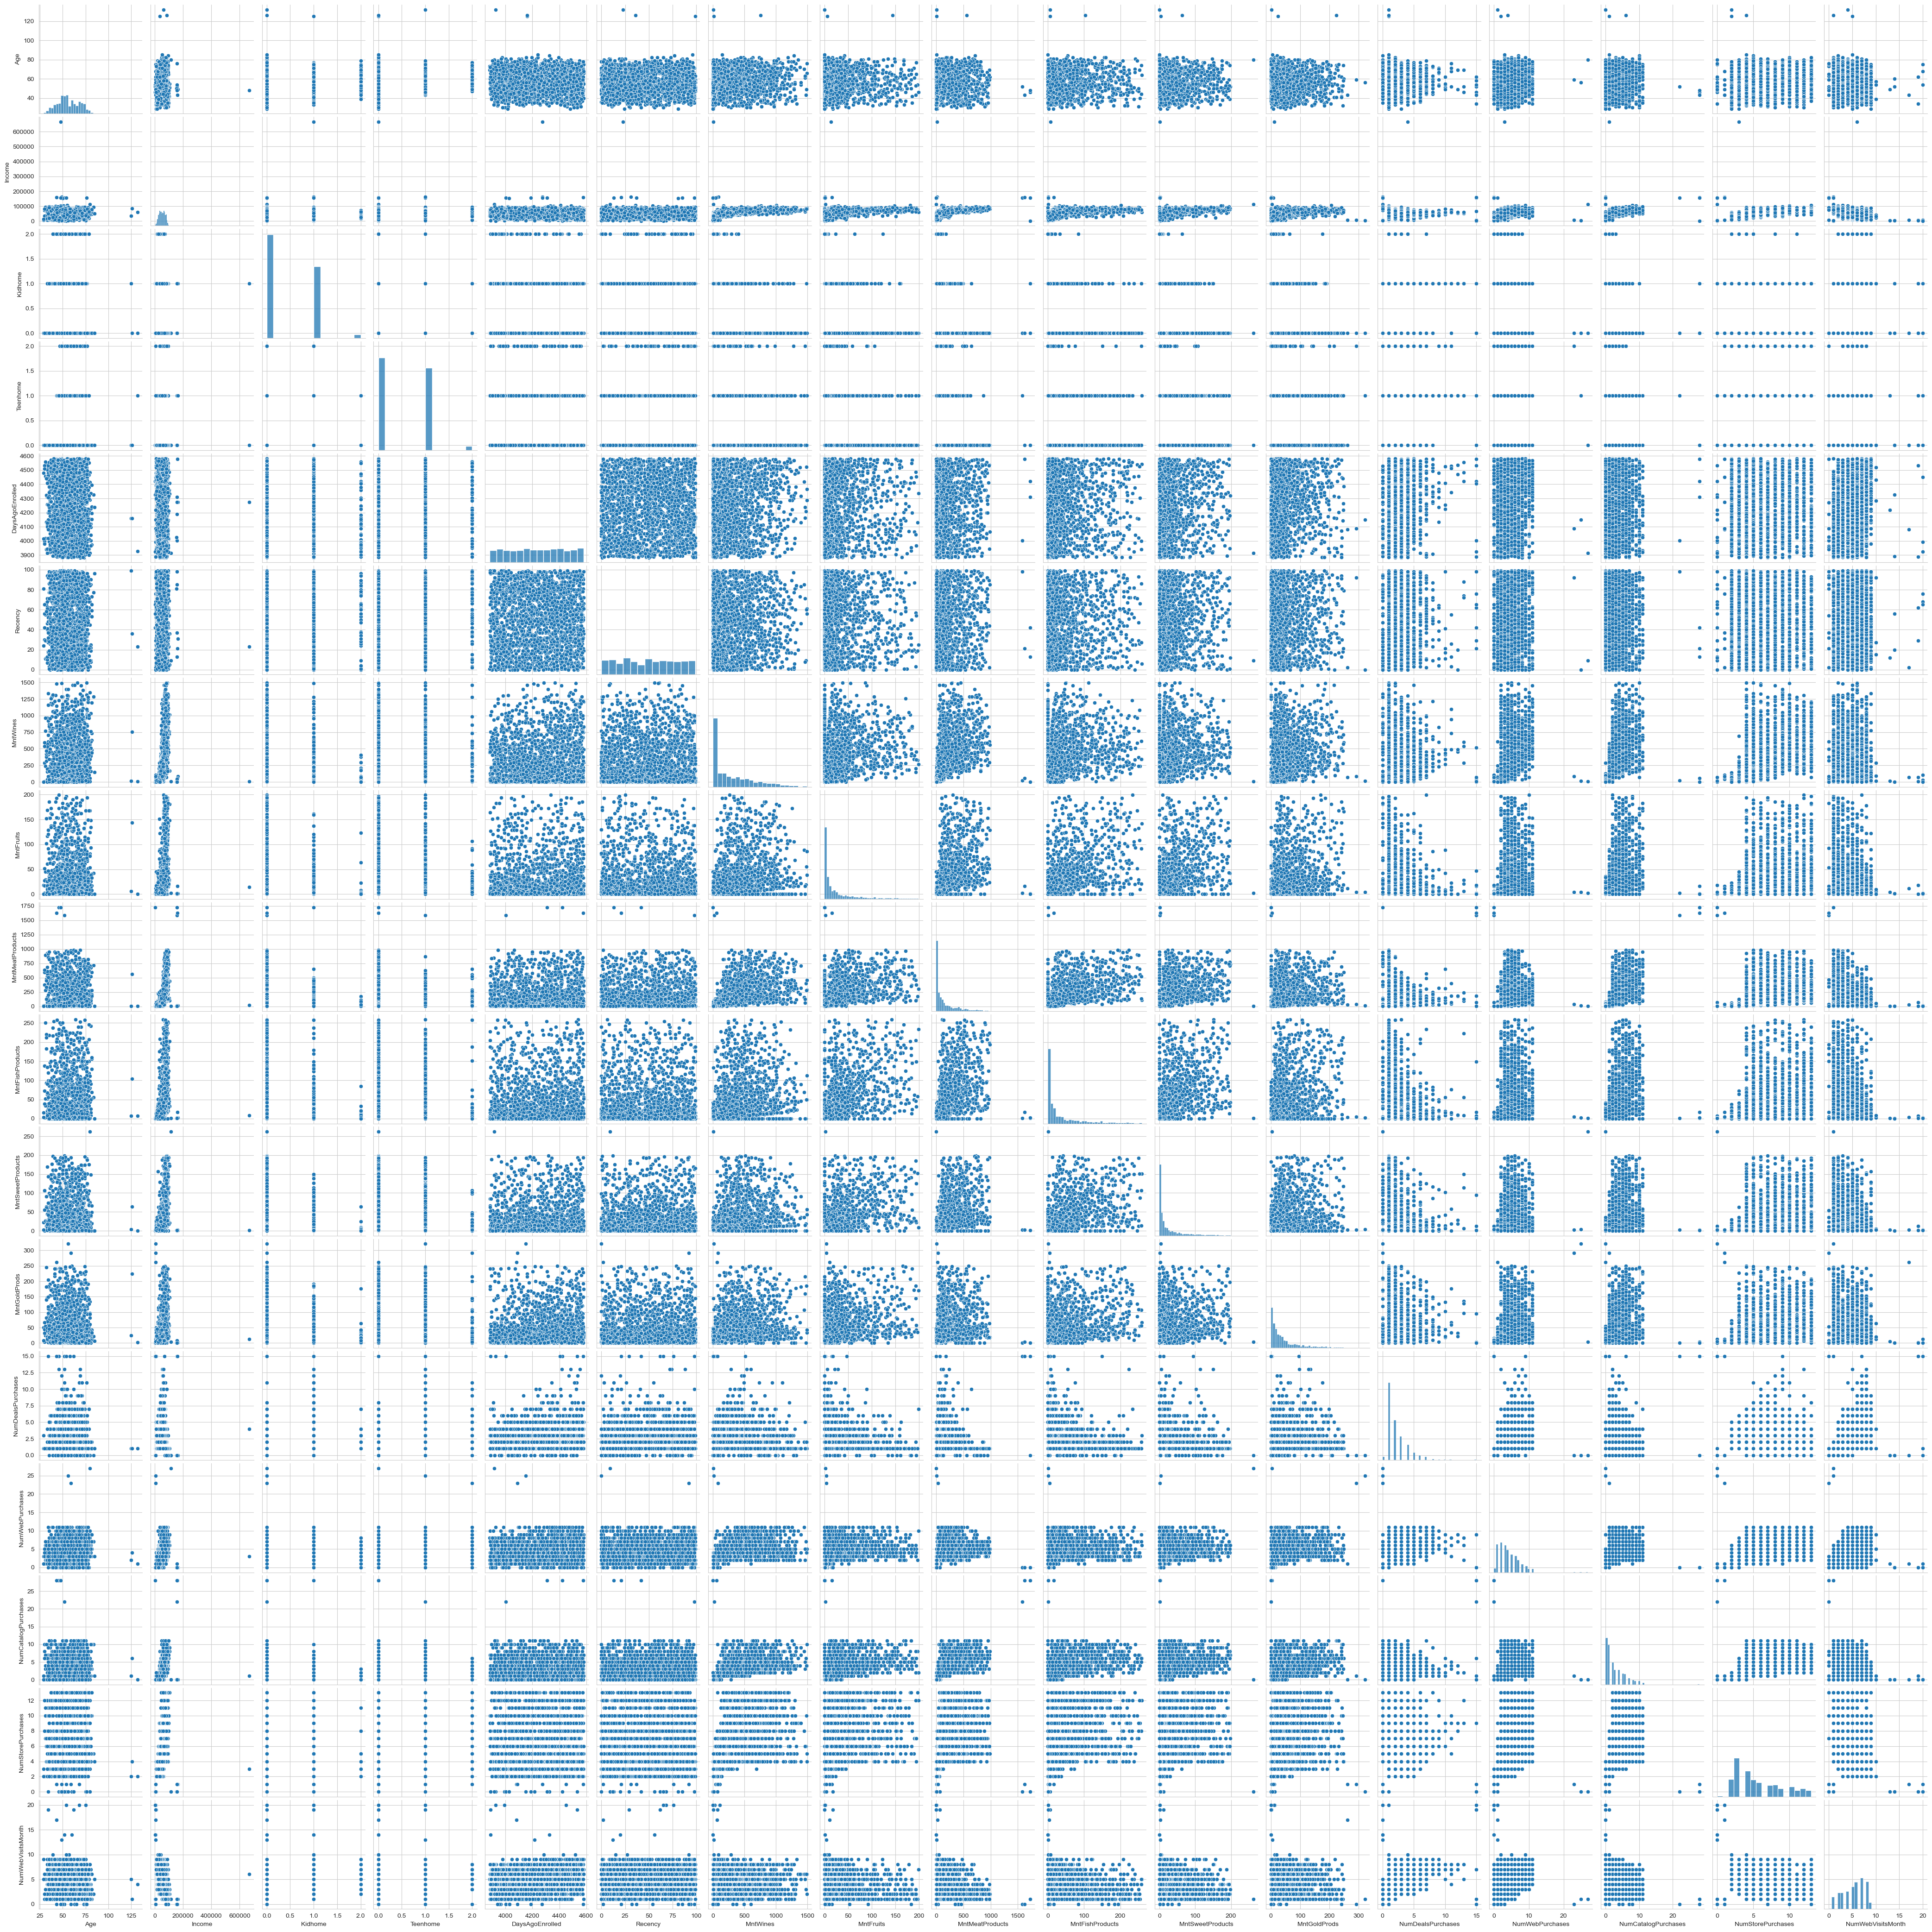

In [25]:
sns.pairplot(df)

### PCA
- We have too many features for bivariate analysis and pairplot. So we will create 3 components to have insight how our data distrubuted. 

In [26]:
scaler = StandardScaler()

In [27]:
scaled_df = scaler.fit_transform(df)

In [28]:
df_s = pd.DataFrame(scaled_df, columns=df.columns)
df_s.head()

Age  Income  Kidhome  Teenhome  DaysAgoEnrolled  Recency  MntWines  \
0  0.99    0.23    -0.82     -0.93             1.53     0.31      0.98   
1  1.24   -0.23     1.04      0.91            -1.19    -0.38     -0.87   
2  0.32    0.77    -0.82     -0.93            -0.21    -0.80      0.36   
3 -1.27   -1.02     1.04     -0.93            -1.06    -0.80     -0.87   
4 -1.02    0.24     1.04     -0.93            -0.95     1.55     -0.39   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       1.55             1.69             2.45              1.48   
1      -0.64            -0.72            -0.65             -0.63   
2       0.57            -0.18             1.34             -0.15   
3      -0.56            -0.66            -0.50             -0.59   
4       0.42            -0.22             0.15             -0.00   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0          0.85               0.35             1.43                 2.50   
1         -0.73              -0.17            -1.13                -0.57   
2         -0.04              -0.69             1.43                -0.23   
3         -0.75              -0.17            -0.76                -0.91   
4         -0.56               1.39             0.33                 0.11   

   NumStorePurchases  NumWebVisitsMonth  
0              -0.55               0.69  
1              -1.17              -0.13  
2               1.29              -0.54  
3              -0.55               0.28  
4               0.06              -0.13

<Axes: >

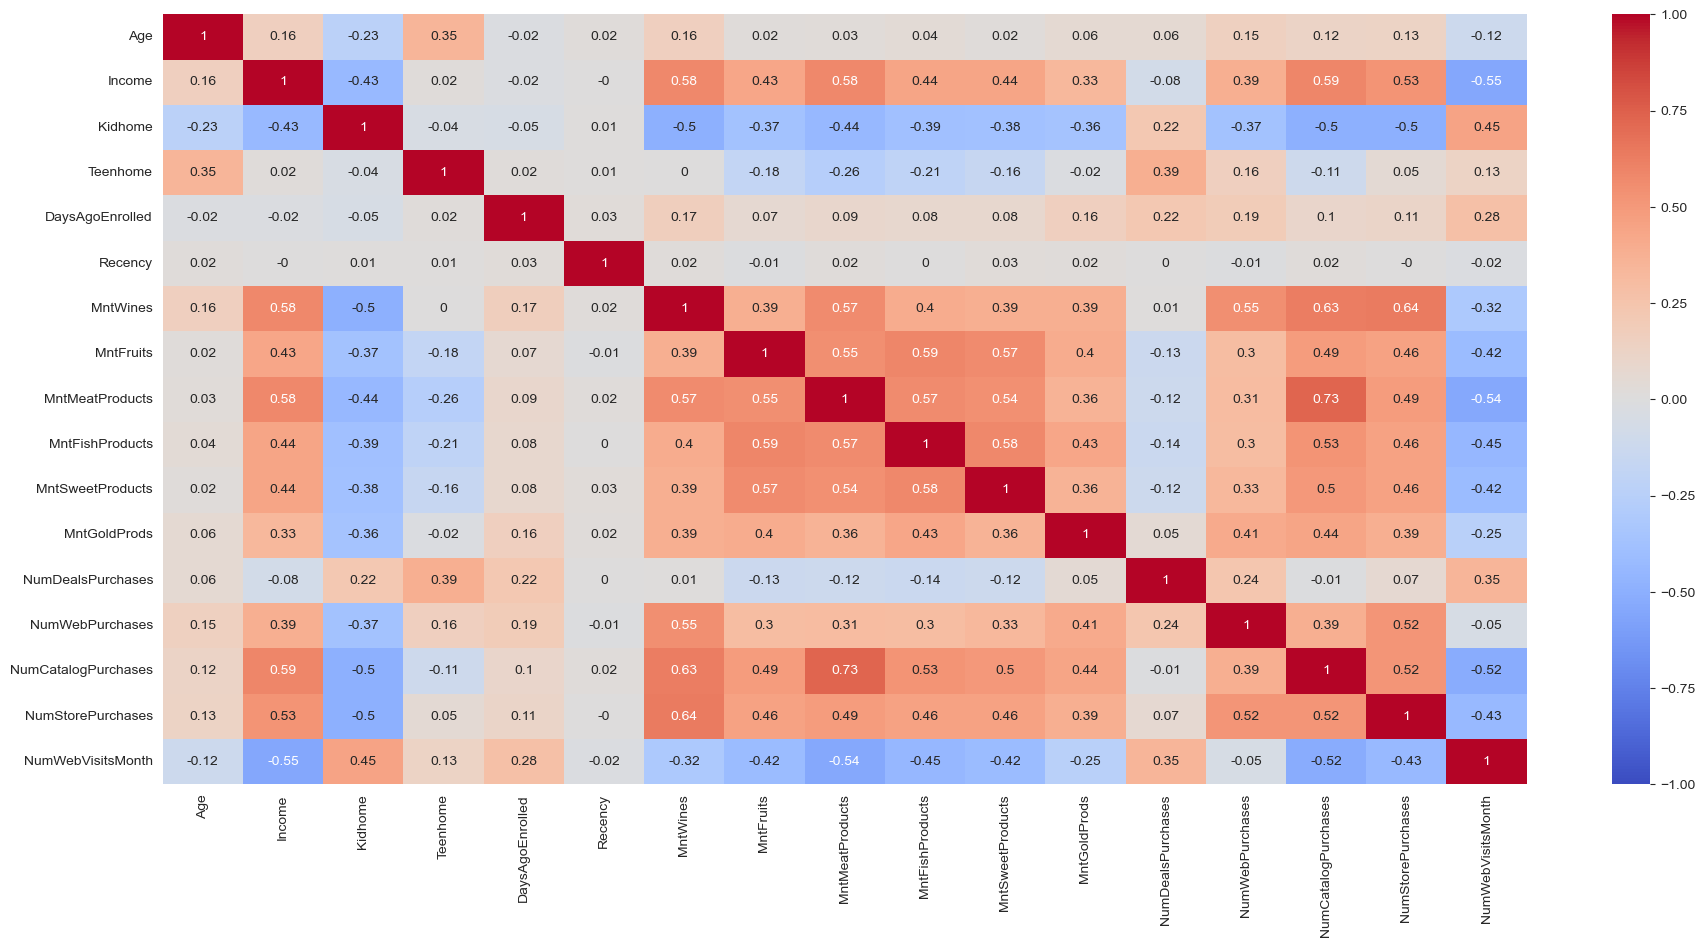

In [ ]:
plt.figure(figsize=(22, 10))
sns.heatmap(df_s.corr().round(2), vmin=-1, vmax=1, annot=True, cmap="coolwarm")

In [ ]:
pca = PCA(n_components=2)

In [ ]:
principal_components = pca.fit_transform(df_s)

In [ ]:
component_X = pd.DataFrame(data=principal_components,
                           columns=["component_1", "component_2"])
component_X

# 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.

The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of purchases and Income
- **Spender Customers** --  Income is less but purcheses high, so can also be treated as potential target customer.

## K-means Clutering

### Create a new dataset with numeric features

#### Determine optimal number of clusters

### inertia

In [29]:
def elbow_vis(X, k_range=range(2, 11), inertia=True):
    """
    This is a function that visualizes the elbow method for determining the optimal number of clusters in a dataset.

    Args:
        X (pd.Dataframe): Input data
        k_range (range, optional): generator for k values. Defaults to range(2, 11).
        inertia (bool, optional): to select either inertia or distorion. Defaults to True.
    Returns:
        None.
    """
    if inertia:
        inertias = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
            inertias.append(kmeanModel.inertia_)
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, "bo--")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.title("The Elbow Method showing the optimal k")
        plt.show()
    else:
        distortion = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42)
            kmeanModel.fit(X)
            distances = kmeanModel.transform(
                X
            )  # distances from each observation to each cluster centroid
            labels = kmeanModel.labels_
            result = []
            for i in range(k):
                cluster_distances = distances[
                    labels == i, i
                ]  # distances from observations in each cluster to their own centroid
                result.append(
                    np.mean(cluster_distances**2)
                )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
            distortion.append(
                sum(result)
            )  # sum the means of all clusters and add it to the distortion list

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, distortion, "r*--", markersize=14.0)
        plt.xlabel("Different k values")
        plt.ylabel("Distortion")
        plt.title("elbow method")

### distortion

### silhoutte score

#### Apply K Means

#### Visualizing and Labeling All the Clusters

### Clustering based on selected features

#### Select features from existing data

#### Determine optimal number of clusters for selected features

#### Building the model based on the optimal number of clusters with selected features

#### We have made our inferences on the Kmeans algorithm so far, and we will take and compare the results with another clustering algorithm, Hierarchical Clustering:


### The point we need to pay attention to is the number of clusters in kmeans so that we can find the differences.

## Hierarchical Clustering

### Determine optimal number of clusters using Dendogram

### silhouette_score

### Clustering based on selected features

## Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___